In [76]:
from tensorflow.keras.utils import img_to_array, to_categorical, load_img
from os import listdir
from os.path import isfile, join
from PIL import Image
import keras.backend as K

In [77]:
!kaggle d download thezaza102/tray-food-segmentation
!unzip tray-food-segmentation.zip

best.h5  classes.csv  TrayDataset/  tray-food-segmentation.zip  tray-solo.ipynb


In [78]:
xtrain_files = [f for f in listdir('./TrayDataset/XTrain') if isfile(join('./TrayDataset/XTrain/', f))]
xtest_files = [f for f in listdir('./TrayDataset/XTest') if isfile(join('./TrayDataset/XTest/', f))]
ytrain_files = [f for f in listdir('./TrayDataset/yTrain') if isfile(join('./TrayDataset/yTrain/', f))]
yttest_files = [f for f in listdir('./TrayDataset/yTest') if isfile(join('./TrayDataset/yTest/', f))]

In [79]:
X_train = []
y_train = []
for i,img_info in enumerate(xtrain_files):
    print (i, ' / ', len(xtrain_files))
    try:
        img = load_img('./TrayDataset/XTrain/'+img_info, target_size=(128,128,3))
        img2 = load_img('./TrayDataset/yTrain/'+img_info.split('.')[0]+'.png', target_size=(128,128,3))
    except:
        continue
    img_array = img_to_array(img)
    X_train.append(img_array / 255.)
    
    img_array = img_to_array(img2, dtype='uint8').copy()
    
    b, g, r    = img_array[:, :, 0], img_array[:, :, 1], img_array[:, :, 2] # For RGB image
    y_train.append(b.reshape(128,128,1))

0  /  1241
1  /  1241
2  /  1241
3  /  1241
4  /  1241
5  /  1241
6  /  1241
7  /  1241
8  /  1241
9  /  1241
10  /  1241
11  /  1241
12  /  1241
13  /  1241
14  /  1241
15  /  1241
16  /  1241
17  /  1241
18  /  1241
19  /  1241
20  /  1241
21  /  1241
22  /  1241
23  /  1241
24  /  1241
25  /  1241
26  /  1241
27  /  1241
28  /  1241
29  /  1241
30  /  1241
31  /  1241
32  /  1241
33  /  1241
34  /  1241
35  /  1241
36  /  1241
37  /  1241
38  /  1241
39  /  1241
40  /  1241
41  /  1241
42  /  1241
43  /  1241
44  /  1241
45  /  1241
46  /  1241
47  /  1241
48  /  1241
49  /  1241
50  /  1241
51  /  1241
52  /  1241
53  /  1241
54  /  1241
55  /  1241
56  /  1241
57  /  1241
58  /  1241
59  /  1241
60  /  1241
61  /  1241
62  /  1241
63  /  1241
64  /  1241
65  /  1241
66  /  1241
67  /  1241
68  /  1241
69  /  1241
70  /  1241
71  /  1241
72  /  1241
73  /  1241
74  /  1241
75  /  1241
76  /  1241
77  /  1241
78  /  1241
79  /  1241
80  /  1241
81  /  1241
82  /  1241
83  /  1241
84

In [80]:
X_test = []
y_test = []
for i,img_info in enumerate(xtest_files):
    print (i, ' / ', len(xtest_files))
    try:
        img = load_img('./TrayDataset/XTest/'+img_info, target_size=(128,128,3))
        img2 = load_img('./TrayDataset/yTest/'+img_info.split('.')[0]+'.png', target_size=(128,128,3))
    except:
        continue
    img_array = img_to_array(img)
    X_test.append(img_array / 255.)
    
    img_array = img_to_array(img2, dtype='uint8').copy()

    b, g, r    = img_array[:, :, 0], img_array[:, :, 1], img_array[:, :, 2] # For RGB image
    y_test.append(b.reshape(128,128,1))

0  /  8
1  /  8
2  /  8
3  /  8
4  /  8
5  /  8
6  /  8
7  /  8


In [81]:
import numpy as np
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [82]:
X_train.shape

(1241, 128, 128, 3)

In [83]:
y_train.shape

(1241, 128, 128, 1)

In [84]:
from keras.layers import Conv2D,MaxPool2D, Conv2DTranspose, Concatenate, Input, Activation, Dropout, UpSampling2D
inp = Input((128,128,3))
conv1 = Conv2D(32,(3,3), padding='same')(inp)
conv1 = Activation('relu')(conv1)
conv1 = Dropout(0.2)(conv1)
conv1 = Conv2D(32,(3,3), padding='same')(conv1)
conv1 = Activation('relu')(conv1)
maxpool1 = MaxPool2D()(conv1)

conv2 = Conv2D(64,(3,3), padding='same')(maxpool1)
conv2 = Activation('relu')(conv2)
conv2 = Dropout(0.2)(conv2)
conv2 = Conv2D(64,(3,3), padding='same')(conv2)
conv2 = Activation('relu')(conv2)
maxpool2 = MaxPool2D()(conv2)

conv3 = Conv2D(128,(3,3), padding='same')(maxpool2)
conv3 = Activation('relu')(conv3)
conv3 = Dropout(0.2)(conv3)
conv3 = Conv2D(128,(3,3), padding='same')(conv3)
conv3 = Activation('relu')(conv3)
maxpool3 = MaxPool2D()(conv3)

encoded = Conv2D(256,(3,3), padding='same')(maxpool3)
encoded = Activation('relu')(encoded)
encoded = Dropout(0.2)(encoded)
encoded = Conv2D(256,(3,3), padding='same')(encoded)
encoded = Activation('relu')(encoded)

up3 = UpSampling2D()(encoded)
up3 = Conv2D(128, (3,3), padding='same')(up3)
up3 = Concatenate()([up3,conv3])
up3 = Conv2D(128,(3,3), padding='same')(up3)
up3 = Activation('relu')(up3)
up3 = Dropout(0.2)(up3)
up3 = Conv2D(128,(3,3), padding='same')(up3)
up3 = Activation('relu')(up3)


up2 = UpSampling2D()(up3)
up2 = Conv2D(64,(3,3), padding='same')(up2)
up2 = Concatenate()([up2,conv2])
up2 = Conv2D(64,(3,3), padding='same')(up2)
up2 = Activation('relu')(up2)
up2 = Dropout(0.2)(up2)
up2 = Conv2D(64,(3,3), padding='same')(up2)
up2 = Activation('relu')(up2)


up1 = UpSampling2D()(up2)
up1 = Conv2D(64,(3,3), padding='same')(up1)
up1 = Concatenate()([up1,conv1])
up1 = Conv2D(32,(3,3), padding='same')(up1)
up1 = Activation('relu')(up1)
up1 = Dropout(0.2)(up1)
up1 = Conv2D(32,(3,3), padding='same')(up1)
up1 = Activation('relu')(up1)

fin = Conv2D(43, (1,1), padding="same", activation="softmax")(up1)

In [85]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [86]:
y_train.shape

(1241, 128, 128, 43)

In [87]:
from keras.models import Model
model = Model(inputs= inp, outputs=fin)
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('best.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
model.compile(
    optimizer="adam",
    loss='categorical_crossentropy',
    metrics=['categorical_crossentropy']
)




In [88]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_104 (Conv2D)            (None, 128, 128, 32  896         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 activation_83 (Activation)     (None, 128, 128, 32  0           ['conv2d_104[0][0]']             
                                )                                                           

In [89]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=100, batch_size=32, callbacks=callbacks_list)

Epoch 1/100
39/39 [==============================] - ETA: 0s - loss: 1.9352 - categorical_crossentropy: 1.9352
Epoch 1: val_loss improved from inf to 0.87653, saving model to best.h5
39/39 [==============================] - 8s 115ms/step - loss: 1.9352 - categorical_crossentropy: 1.9352 - val_loss: 0.8765 - val_categorical_crossentropy: 0.8765
Epoch 2/100
39/39 [==============================] - ETA: 0s - loss: 0.7953 - categorical_crossentropy: 0.7953
Epoch 2: val_loss improved from 0.87653 to 0.70306, saving model to best.h5
39/39 [==============================] - 4s 103ms/step - loss: 0.7953 - categorical_crossentropy: 0.7953 - val_loss: 0.7031 - val_categorical_crossentropy: 0.7031
Epoch 3/100
39/39 [==============================] - ETA: 0s - loss: 0.6568 - categorical_crossentropy: 0.6568
Epoch 3: val_loss improved from 0.70306 to 0.66227, saving model to best.h5
39/39 [==============================] - 4s 103ms/step - loss: 0.6568 - categorical_crossentropy: 0.6568 - val_loss: 

KeyboardInterrupt: 

In [90]:
from keras.models import load_model
model2 = load_model('best.h5')

In [91]:
model.load_weights('best.h5')

In [110]:
X_pred = model.predict(X_test)

1/1 [==============================] - 0s 42ms/step


In [111]:
X_pred

array([[[[9.99960542e-01, 3.73603762e-05, 1.42728686e-06, ...,
          4.92129615e-10, 1.80318065e-12, 2.64529859e-07],
         [1.00000000e+00, 4.33217586e-08, 2.03552383e-10, ...,
          2.73324165e-17, 4.58818305e-21, 1.20180515e-11],
         [1.00000000e+00, 1.69733216e-09, 1.13765681e-12, ...,
          4.75271767e-21, 5.45574575e-25, 1.30252619e-14],
         ...,
         [9.99998569e-01, 1.42025988e-06, 4.86390750e-09, ...,
          4.70097526e-15, 3.62547508e-15, 6.41694467e-12],
         [9.99986529e-01, 1.20555424e-05, 1.22024659e-07, ...,
          8.24848924e-13, 9.31217018e-13, 1.94172109e-10],
         [9.98286307e-01, 9.96369286e-04, 1.23120568e-04, ...,
          3.11032373e-08, 7.52962919e-08, 1.27454018e-06]],

        [[1.00000000e+00, 2.51621532e-08, 4.30691122e-10, ...,
          4.57618602e-16, 2.42328740e-21, 8.20398176e-12],
         [1.00000000e+00, 9.71574275e-13, 5.90181747e-16, ...,
          2.36892407e-27, 9.28866539e-36, 1.09534626e-18],
        

In [121]:
X_pred.shape

(8, 128, 128, 43)

In [119]:
X_pred_masked = []
for index, predicted in enumerate(X_pred):
    temp = X_test[index].copy()
    for j in range(temp.shape[2]):
        temp[:,:,j] = temp[:,:,j] * np.argmax(predicted, axis=-1).reshape(128,128)
    X_pred_masked.append(temp)
X_pred_masked = np.array(X_pred_masked)

In [116]:
y_test.shape

(8, 128, 128, 43)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


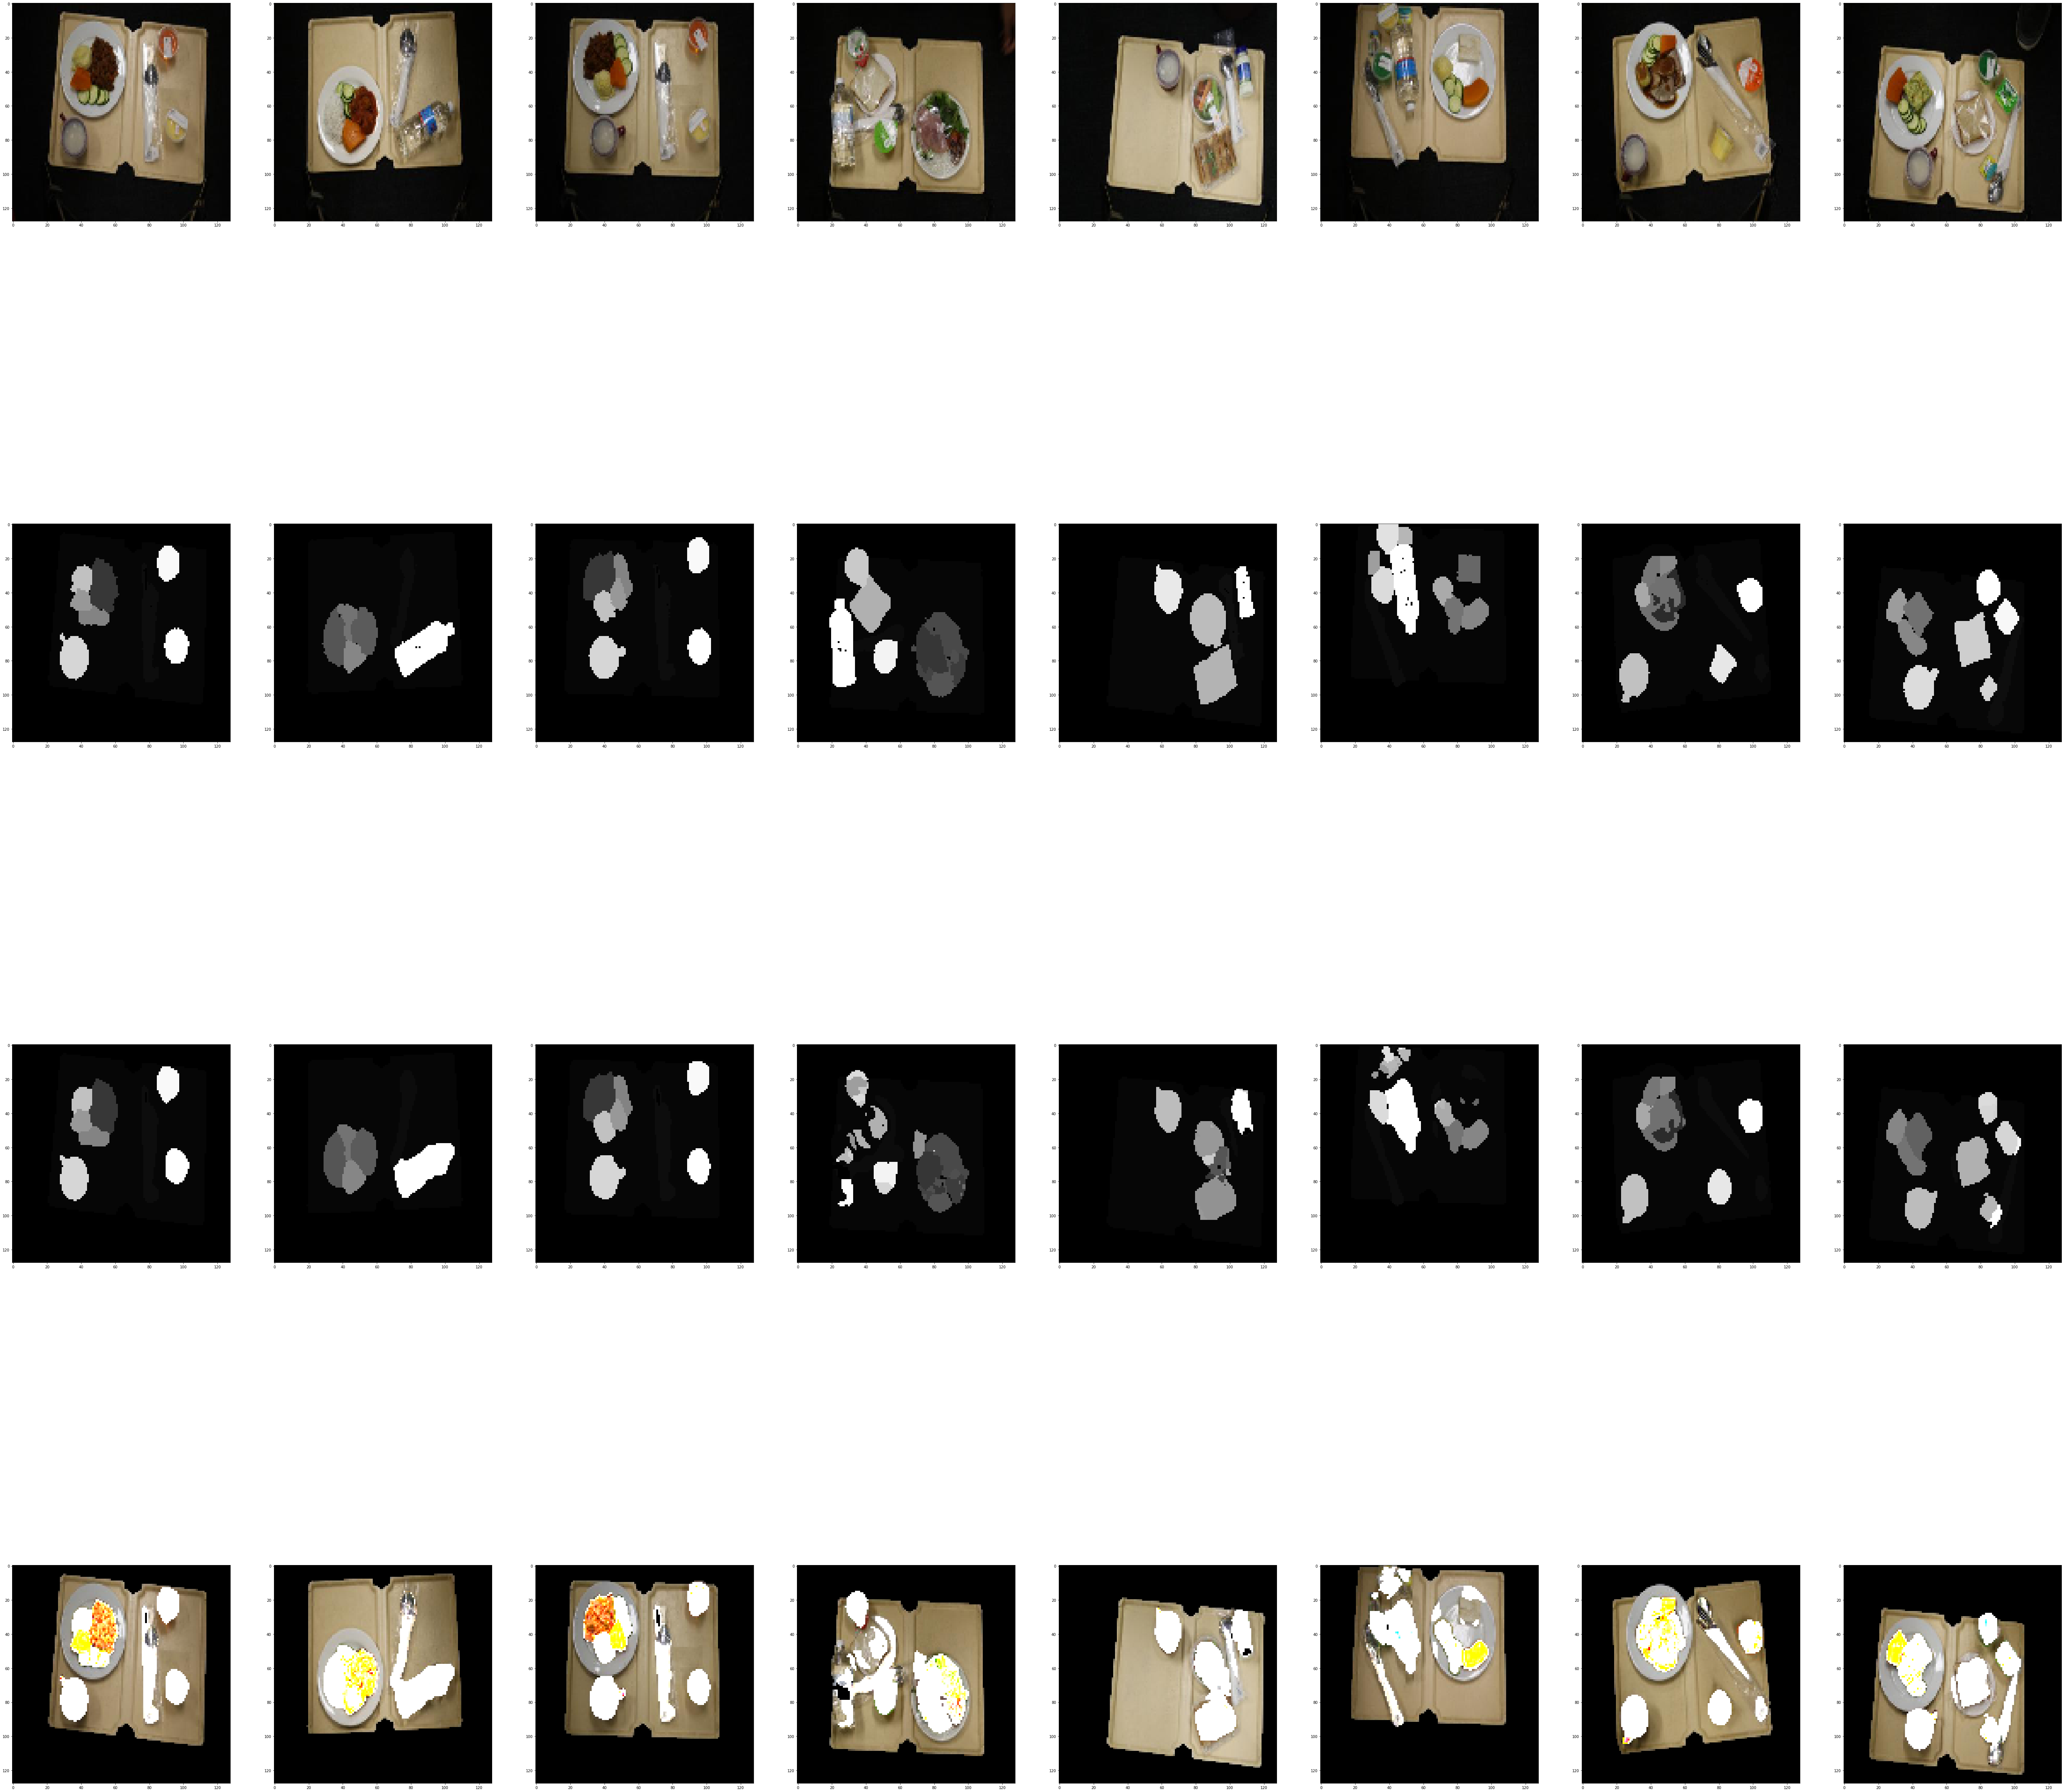

In [120]:
%matplotlib inline
import matplotlib.pyplot as plt
base_indice = 0
fig, ax = plt.subplots(nrows=4, ncols=8,figsize=(100, 100))
plt.gray()
for indice, row in enumerate(ax):
    for indice2, col in enumerate(row):
        if indice == 0:
            col.imshow(X_test[base_indice + indice2].reshape(128,128,3))
        elif indice == 1:
            col.imshow(np.argmax(y_test[base_indice + indice2],axis=-1))
        elif indice == 2:
            col.imshow(np.argmax(X_pred[base_indice + indice2],axis=-1))
        elif indice == 3:
            col.imshow(X_pred_masked[base_indice + indice2].reshape(128,128,3))

plt.show()

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_32 (Conv2D)             (None, 128, 128, 32  896         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 activation_27 (Activation)     (None, 128, 128, 32  0           ['conv2d_32[0][0]']              
                                )                                                           